In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("dataset/diabetes.csv")
df.columns
df.head(5)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Replace missing values with nan
cols_with_missing_values = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df.loc[:, cols_with_missing_values] = df.loc[:, cols_with_missing_values].replace(0, np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Split training and test set

In [7]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

## Impute missing values

Impute after splitting training and test set to avoid data leakage.

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train, y_train)

## Model training

In [9]:
def get_dataframe(X, y, columns):
    return pd.DataFrame(np.c_[X, y], columns=columns)

In [10]:
from sklearn.linear_model import LogisticRegression

# from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Perform cross validation
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler


def perform_cross_validation(X, y):
    std_scaler = StandardScaler()
    X_train_scaled = std_scaler.fit_transform(X, y)
    clf = LogisticRegression(random_state=42)
    return cross_val_predict(clf, X_train_scaled, y, cv=5, n_jobs=-1)


def print_metrics(y_test, y_hat):
    print(f"Accuracy: {accuracy_score(y_test, y_hat)}")
    print(f"Confusion Matrix: {confusion_matrix(y_test, y_hat)}")

## No data preprocessing

In [11]:
df_train = get_dataframe(X_train, y_train, df.columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   691 non-null    float64
 2   BloodPressure             691 non-null    float64
 3   SkinThickness             691 non-null    float64
 4   Insulin                   691 non-null    float64
 5   BMI                       691 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       691 non-null    float64
 8   Outcome                   691 non-null    float64
dtypes: float64(9)
memory usage: 48.7 KB


In [12]:
y_pred = perform_cross_validation(
    df_train.drop(columns=["Outcome"]).values, df_train.loc[:, "Outcome"].values
)

print_metrics(y_train, y_pred)

Accuracy: 0.76410998552822
Confusion Matrix: [[395  55]
 [108 133]]


## Perform log transformation

In [13]:
df_train = get_dataframe(X_train, y_train, df.columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   691 non-null    float64
 2   BloodPressure             691 non-null    float64
 3   SkinThickness             691 non-null    float64
 4   Insulin                   691 non-null    float64
 5   BMI                       691 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       691 non-null    float64
 8   Outcome                   691 non-null    float64
dtypes: float64(9)
memory usage: 48.7 KB


In [14]:
df_train.corr()["Outcome"]

Pregnancies                 0.213637
Glucose                     0.498803
BloodPressure               0.155981
SkinThickness               0.217953
Insulin                     0.246617
BMI                         0.309201
DiabetesPedigreeFunction    0.169109
Age                         0.236696
Outcome                     1.000000
Name: Outcome, dtype: float64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

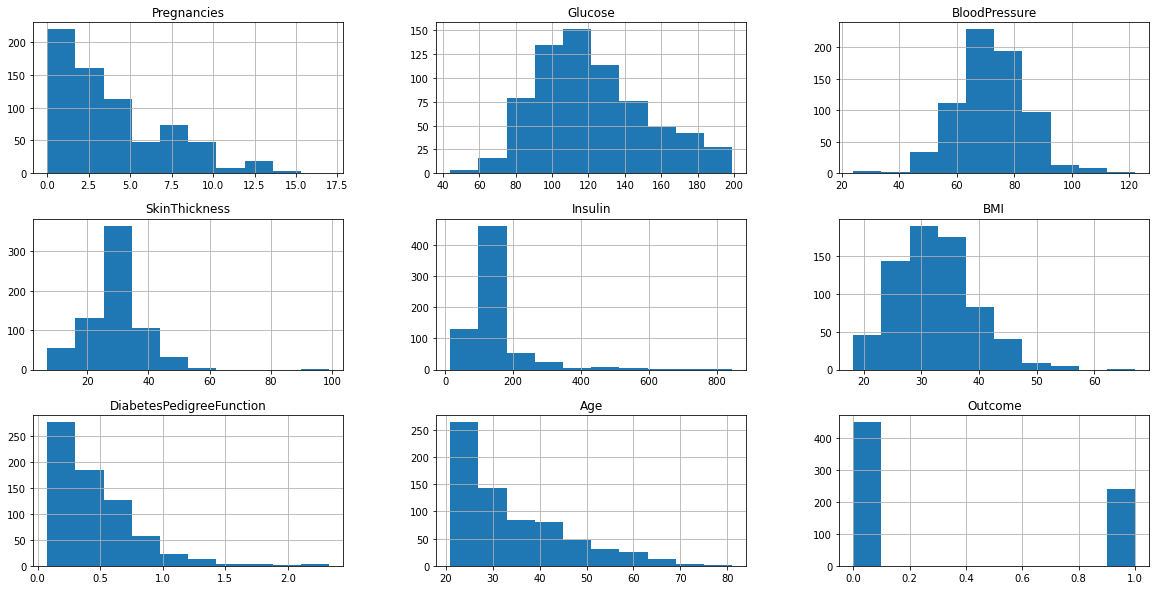

In [15]:
df_train.hist(figsize=(20, 10))

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

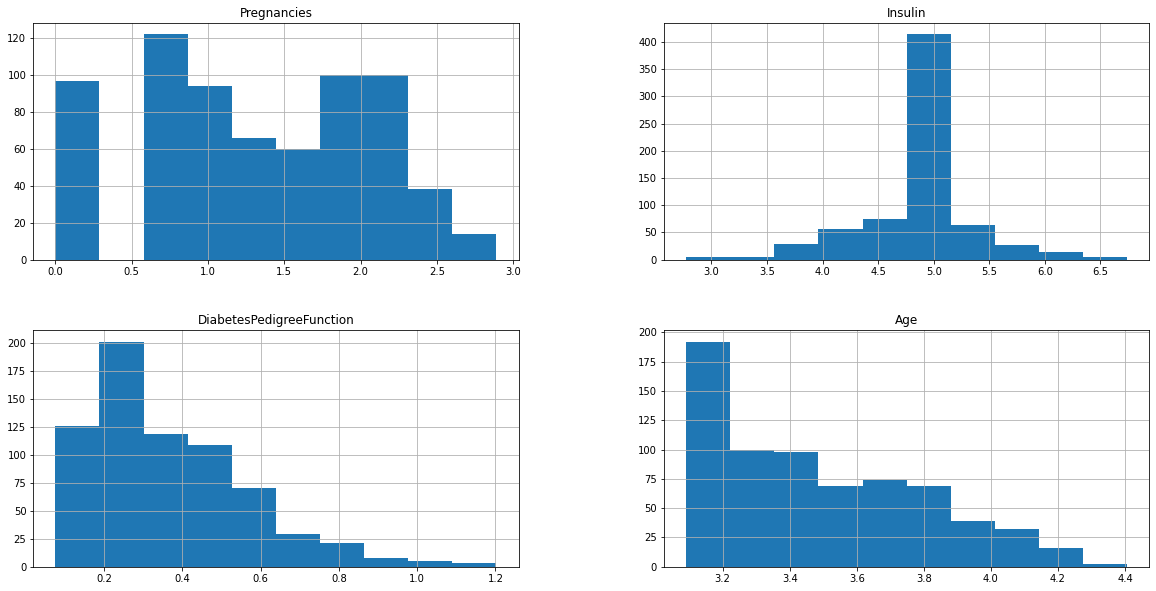

In [16]:
# lets perform log transformation on age, pregnancies, diabeticpredigreefunction, Insulin
# Glucose, bloodpressure and BMI already look like normally distributed
cols_to_normal_dist = ["Pregnancies", "Insulin", "DiabetesPedigreeFunction", "Age"]
df_train.loc[:, cols_to_normal_dist] = pd.DataFrame(
    np.log(1 + df_train.loc[:, cols_to_normal_dist].values), columns=cols_to_normal_dist
)

df_train.loc[:, cols_to_normal_dist].hist(figsize=(20, 10))

In [17]:
df_train.corr()["Outcome"]

Pregnancies                 0.169498
Glucose                     0.498803
BloodPressure               0.155981
SkinThickness               0.217953
Insulin                     0.292262
BMI                         0.309201
DiabetesPedigreeFunction    0.177285
Age                         0.269421
Outcome                     1.000000
Name: Outcome, dtype: float64

In [18]:
y_pred = perform_cross_validation(
    df_train.drop(columns=["Outcome"]).values, df_train.loc[:, "Outcome"].values
)

print_metrics(y_train, y_pred)

Accuracy: 0.7626628075253257
Confusion Matrix: [[394  56]
 [108 133]]


Accuracy reduced from 0.764 to 0.762

## Binning Glucose and BMI

In [19]:
df_train = get_dataframe(X_train, y_train, df.columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   691 non-null    float64
 2   BloodPressure             691 non-null    float64
 3   SkinThickness             691 non-null    float64
 4   Insulin                   691 non-null    float64
 5   BMI                       691 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       691 non-null    float64
 8   Outcome                   691 non-null    float64
dtypes: float64(9)
memory usage: 48.7 KB


> **Oral glucose tolerance test**-For this test, you fast overnight, and the fasting blood sugar level is measured. Then you drink a sugary liquid, and blood sugar levels are tested periodically for the next two hours.A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.

In [20]:
glucose = df_train["Glucose"]
glucose.min(), glucose.max(), glucose.mean()

(44.0, 199.0, 121.616497829233)

In [21]:
# introduce three categories normal, prediabetes and diabetes
glucose_bins = [0, 100, 140, 200]
glucose_bin_labels = ["low", "normal", "prediabetic"]
df_train["GlucoseLevel"] = pd.cut(
    df_train.loc[:, "Glucose"], bins=glucose_bins, right=False, labels=glucose_bin_labels
)
df_train.dtypes

Pregnancies                  float64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                      float64
GlucoseLevel                category
dtype: object

In [22]:
df_train.loc[:, ["Glucose", "GlucoseLevel", "Outcome"]].groupby(["GlucoseLevel", "Outcome"]).count()

Glucose
GlucoseLevel Outcome         
low          0.0          161
             1.0           13
normal       0.0          237
             1.0          107
prediabetic  0.0           52
             1.0          121

In [23]:
df_train.loc[:, ["Glucose", "Outcome"]].groupby("Outcome", as_index=False).mean()

,Outcome,Glucose
0,0.0,110.571111
1,1.0,142.240664


In [24]:
bmi_bins = [0, 19, 25, 30, df_train["BMI"].max() + 1]
bmi_bin_categories = ["underweight", "normal", "overweight", "obese"]
df_train["BMILevel"] = pd.cut(
    df_train.loc[:, "BMI"], bins=bmi_bins, right=False, labels=bmi_bin_categories
)
df_train.dtypes

Pregnancies                  float64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                      float64
GlucoseLevel                category
BMILevel                    category
dtype: object

In [25]:
df_train.loc[:, ["BMI", "BMILevel", "Outcome"]].groupby(["BMILevel", "Outcome"]).count()

BMI
BMILevel    Outcome       
underweight 0.0        3.0
            1.0        NaN
normal      0.0       82.0
            1.0        7.0
overweight  0.0      128.0
            1.0       38.0
obese       0.0      237.0
            1.0      196.0

In [26]:
df_train.corr()["Outcome"]

Pregnancies                 0.213637
Glucose                     0.498803
BloodPressure               0.155981
SkinThickness               0.217953
Insulin                     0.246617
BMI                         0.309201
DiabetesPedigreeFunction    0.169109
Age                         0.236696
Outcome                     1.000000
Name: Outcome, dtype: float64

In [27]:
# perform cross validation using logistic regression classifier
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_train.loc[:, ["GlucoseLevelEnc", "BMILevelEnc"]] = ordinal_encoder.fit_transform(
    df_train.loc[:, ["GlucoseLevel", "BMILevel"]], df_train["Outcome"]
)
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlucoseLevel,BMILevel,GlucoseLevelEnc,BMILevelEnc
0,1.0,113.0,64.0,35.0,123.5,33.6,0.543,21.0,1.0,normal,obese,1.0,1.0
1,1.0,88.0,30.0,42.0,99.0,55.0,0.496,26.0,1.0,low,obese,0.0,1.0
2,1.0,146.0,56.0,29.0,123.5,29.7,0.564,29.0,0.0,prediabetic,overweight,2.0,2.0
3,2.0,155.0,74.0,17.0,96.0,26.6,0.433,27.0,1.0,prediabetic,overweight,2.0,2.0
4,6.0,129.0,90.0,7.0,326.0,19.6,0.582,60.0,0.0,normal,normal,1.0,0.0


In [28]:
df_train.loc[:, ["GlucoseLevelEnc", "BMILevelEnc", "Outcome"]].corr()["Outcome"]

GlucoseLevelEnc    0.464285
BMILevelEnc        0.010217
Outcome            1.000000
Name: Outcome, dtype: float64

In [29]:
# predicting with only the ordinal encoded features
y_pred = perform_cross_validation(
    df_train.drop(columns=["Glucose", "GlucoseLevel", "BMI", "BMILevel", "Outcome"]).values,
    df_train.loc[:, "Outcome"].values,
)

print_metrics(y_train, y_pred)

Accuracy: 0.7597684515195369
Confusion Matrix: [[393  57]
 [109 132]]


Accuracy reduced from 0.764 to 0.759

## Using feature interactions